# Word Embeddings

## Kütüphaneler içe aktarma
```
%pip install gensim
```

In [1]:
from gensim.models import Word2Vec,FastText
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## örnek metin

In [3]:
cumleler = [
    "Bugün hava çok güzel ve güneşli.",
    "Yarın hava yağmurlu olacak.",
    "Bugün parka gittik ve çok eğlendik.",
    "Yarın da parka gitmek istiyoruz.",
    "Bugün hava yagmurlu olacak.",
    "Yarın hava güzel olacak.",
    ]

## Tokenizasyon

In [4]:
tokenize_cumleler = [simple_preprocess(cumle) for cumle in cumleler]
tokenize_cumleler

[['bugün', 'hava', 'çok', 'güzel', 've', 'güneşli'],
 ['yarın', 'hava', 'yağmurlu', 'olacak'],
 ['bugün', 'parka', 'gittik', 've', 'çok', 'eğlendik'],
 ['yarın', 'da', 'parka', 'gitmek', 'istiyoruz'],
 ['bugün', 'hava', 'yagmurlu', 'olacak'],
 ['yarın', 'hava', 'güzel', 'olacak']]

## Modellerin tanımlanması

In [5]:
modelWord2Vec = Word2Vec(sentences=tokenize_cumleler, vector_size=50,window=5,min_count=1,workers=4,sg=0)
modelFastText = FastText(sentences=tokenize_cumleler, vector_size=50,window=5,min_count=1,workers=4,sg=0)

In [13]:
kelime_vektorleri = modelWord2Vec.wv 
kelimeler = list(kelime_vektorleri.index_to_key)
kelime_vektorleri.key_to_index

{'hava': 0,
 'olacak': 1,
 'yarın': 2,
 'bugün': 3,
 'parka': 4,
 've': 5,
 'güzel': 6,
 'çok': 7,
 'yagmurlu': 8,
 'istiyoruz': 9,
 'gitmek': 10,
 'da': 11,
 'eğlendik': 12,
 'gittik': 13,
 'yağmurlu': 14,
 'güneşli': 15}

In [18]:
def plot_wordembeddings(model,title):
    kelime_vektorleri = model.wv 
    kelimeler = list(kelime_vektorleri.index_to_key)[:1000]
    vektorler = [kelime_vektorleri[kelime] for kelime in kelimeler]
    pca = PCA(n_components=3)
    reduce_vektorleri = pca.fit_transform(vektorler)

    # 3d görselleştirme
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111,projection='3d')
    # vektorleri çizelim
    ax.scatter(reduce_vektorleri[:,0],reduce_vektorleri[:,1],reduce_vektorleri[:,2])
    for i,kelime in enumerate(kelimeler):
        ax.text(reduce_vektorleri[i,0],reduce_vektorleri[i,1],reduce_vektorleri[i,2],kelime)
    plt.title(title)
    plt.show()



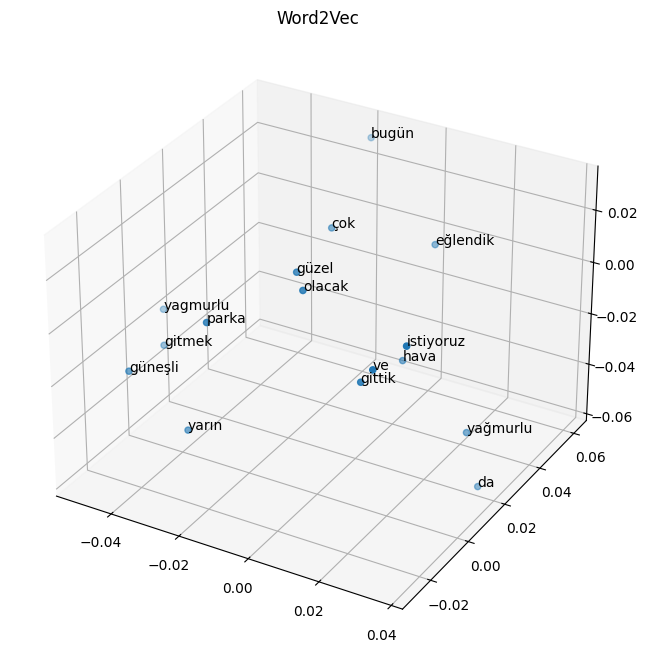

In [19]:
plot_wordembeddings(modelWord2Vec,"Word2Vec")

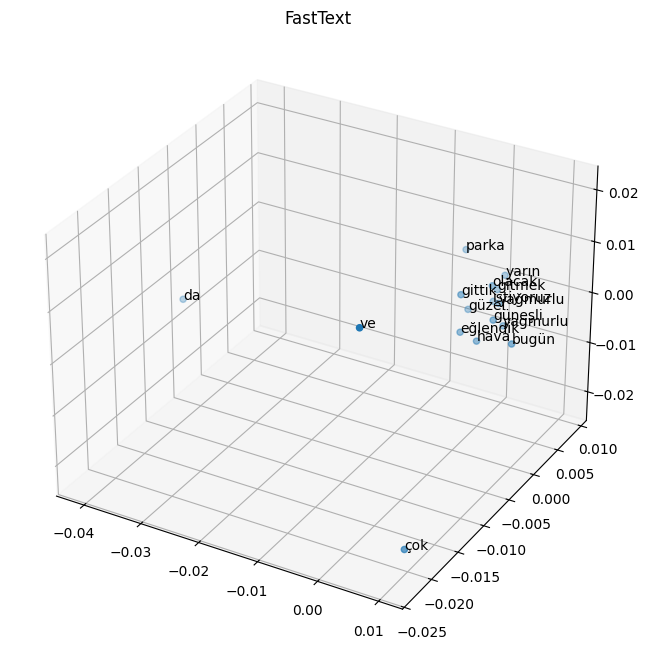

In [20]:
plot_wordembeddings(modelFastText,"FastText")